# Data Retouch

This notebook modifies the PV data generated by `Data Cleaning` to be 15-min resolution.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)  # to display all columns of dataframes

In [15]:
df_summer = pd.read_csv('157_9.99_summer.csv',header=None)
df_winter = pd.read_csv('157_9.99_winter.csv',header=None)
df_shift_summer = pd.read_csv('157_9.99_summer_shift.csv',header=None)

summer = pd.read_csv('157_9.99_summer.csv',header=None).values
winter = pd.read_csv('157_9.99_winter.csv',header=None).values
shift_summer = pd.read_csv('157_9.99_summer_shift.csv',header=None).values
shift_summer

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

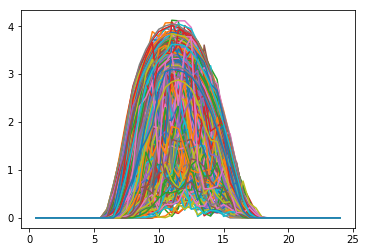

In [16]:
t = np.arange(0.5,24.5,0.5)
for i in range(winter.shape[0]):
    plt.plot(t,winter[i,])
plt.show()

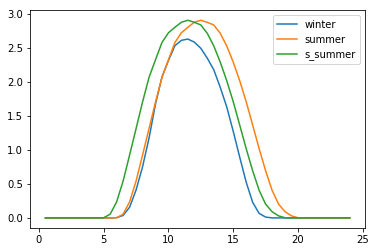

In [17]:
plt.plot(t,np.mean(winter,0),label="winter")
plt.plot(t,np.mean(summer,0),label="summer")
plt.plot(t,np.mean(shift_summer,0),label="s_summer")
plt.legend()
plt.show()

In [18]:
len(df_summer.columns)

48

In [19]:
new_colname = np.arange(1,len(df_summer.columns)*2,2)
for df in [df_summer,df_shift_summer,df_winter]:
    df.columns =new_colname

In [20]:
# new column names for 96 step size
all_colname = np.arange(0,len(df_summer.columns)*2,1)
all_colname

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [21]:
df_summer = df_summer.reindex(columns = all_colname) # add the new columns 
df_shift_summer = df_shift_summer.reindex(columns = all_colname) # add the new columns 
df_winter = df_winter.reindex(columns = all_colname) # add the new columns 

In [22]:
for df in [df_summer,df_shift_summer,df_winter]:
    df.interpolate(method='linear',axis=1,inplace=True) # interpolate by linear
    df.fillna(0, inplace=True)  # fill NaN (at the first column by 0.0)

In [23]:
# df_summer = df_summer.interpolate(method='linear',axis=1)
# df_summer = df_summer.fillna(0)
df_winter

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0190,0.038,0.1505,0.263,0.4005,0.538,0.7410,0.944,1.1875,1.431,1.4345,1.438,1.6690,1.900,1.7470,1.594,2.2565,2.919,2.9940,3.069,2.9125,2.756,2.5530,2.350,2.4065,2.463,2.2940,2.125,1.8125,1.500,1.3250,1.150,0.9530,0.756,0.5435,0.331,0.2220,0.113,0.0595,0.006,0.0030,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0030,0.006,0.0560,0.106,0.2310,0.356,0.5560,0.756,1.1685,1.581,1.2095,0.838,0.8440,0.850,0.9250,1.000,0.9280,0.856,0.7655,0.675,0.6250,0.575,0.5470,0.519,0.5375,0.556,0.5375,0.519,0.4315,0.344,0.3220,0.300,0.2905,0.281,0.2560,0.231,0.1685,0.106,0.0530,0.000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0470,0.094,0.1940,0.294,0.4565,0.619,1.0595,1.500,1.8220,2.144,2.3785,2.613,2.7660,2.919,2.8625,2.806,2.9435,3.081,3.0375,2.994,2.9595,2.925,2.8440,2.763,2.6440,2.525,2.3655,2.206,2.0155,1.825,1.6030,1.381,1.1405,0.900,0.6625,0.425,0.2655,0.106,0.0560,0.006,0.0030,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0095,0.019,0.0500,0.081,0.3500,0.619,0.7190,0.819,0.6625,0.506,1.1185,1.731,1.3435,0.956,0.9000,0.844,1.1410,1.438,1.1940,0.950,1.1095,1.269,1.3785,1.488,1.8095,2.131,1.9780,1.825,1.4375,1.050,0.8280,0.606,0.4375,0.269,0.2345,0.200,0.1625,0.125,0.0690,0.013,0.0065,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0065,0.013,0.0345,0.056,0.2435,0.431,0.4155,0.400,0.2815,0.163,0.2285,0.294,0.4625,0.631,0.7935,0.956,1.3155,1.675,1.4720,1.269,1.1500,1.031,1.1280,1.225,1.2780,1.331,1.2530,1.175,1.1500,1.125,0.9065,0.688,0.5565,0.425,0.3440,0.263,0.1785,0.094,0.0470,0.000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.0280,0.056,0.0750,0.094,0.0940,0.094,0.2910,0.488,0.9160,1.344,1.8690,2.394,1.9375,1.481,0.9280,0.375,0.6500,0.925,0.7750,0.625,0.6345,0.644,0.9190,1.194,1.5845,1.975,1.5280,1.081,0.8905,0.700,0.6345,0.569,0.5250,0.481,0.3000,0.119,0.0625,0.006,0.0030,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0095,0.019,0.0690,0.119,0.2660,0.413,0.8845,1.356,1.6155,1.875,1.8625,1.850,1.5405,1.231,1.4435,1.656,1.4750,1.294,2.0785,2.863,2.4380,2.013,1.5470,1.081,1.0345,0.988,0.8470,0.706,0.8310,0.956,0.9125,0.869,0.7220,0.575,0.3280,0.081,0.0685,0.056,0.0280,0.000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0065,0.013,0.1630,0.313,0.4505,0.588,0.6035,0.619,1.2565,1.894,1.21

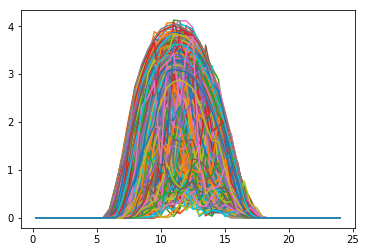

In [24]:
t96 = np.arange(0.25,24.25,0.25)
for i in range(df_winter.shape[0]):
    plt.plot(t96,df_winter.iloc[i,])
plt.show()
# # plt.plot(t,df_summer[0,])
# # plt.show()
# df_summer.iloc[0,]

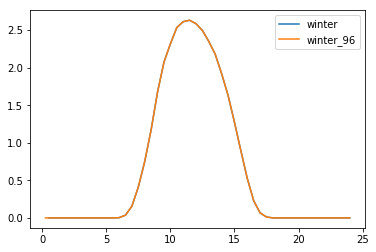

In [25]:
plt.plot(t,np.mean(winter,0),label="winter")
plt.plot(t96,df_winter.mean(axis=0),label="winter_96")
plt.legend()
plt.show()

In [26]:
# save as csv files
csvname = '15m_157_9.99'
df_winter.to_csv(csvname+'_winter.csv', index=False,header=False)
df_summer.to_csv(csvname+'_summer.csv', index=False,header=False)
df_shift_summer.to_csv(csvname+'_summer_shift.csv', index=False,header=False)
# winter 
# csvname = str(selectID) + '_' + str(selectCapacity) +'_winter.csv'
